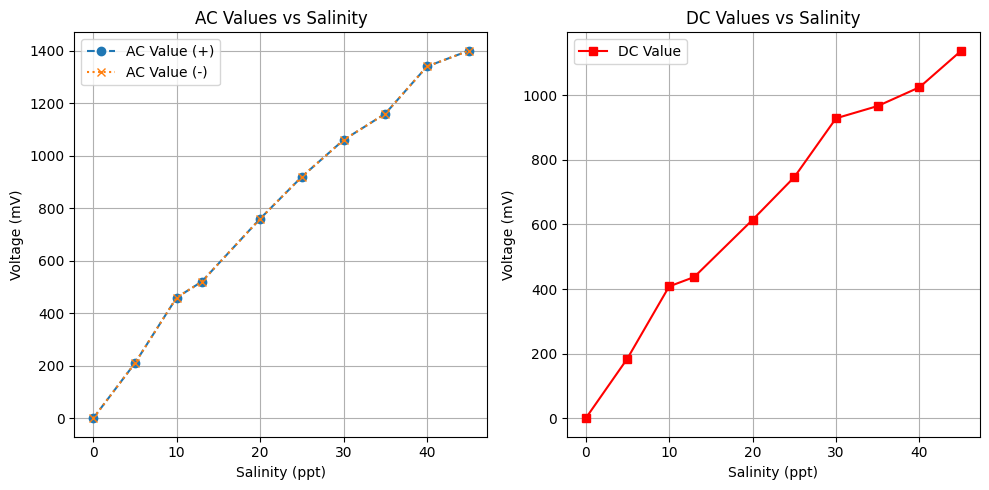

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
def load_data(file_path):
    df = pd.read_excel(file_path)
    # Convert voltage columns to numeric (handling 'mV' strings)
    for col in ["ac_val(+)mv", "ac_val(-mv)", "dc_val"]:
        df[col] = df[col].astype(str).str.replace("mV", "").astype(float)
    return df

def plot_values(df):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(df["ppt"], df["ac_val(+)mv"] , label="AC Value (+)", linestyle='dashed', marker='o')
    plt.plot(df["ppt"], df["ac_val(-mv)"], label="AC Value (-)", linestyle='dotted', marker='x')
    plt.xlabel("Salinity (ppt)")
    plt.ylabel("Voltage (mV)")
    plt.title("AC Values vs Salinity")
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(df["ppt"], df["dc_val"], label="DC Value", color='r', marker='s')
    plt.xlabel("Salinity (ppt)")
    plt.ylabel("Voltage (mV)")
    plt.title("DC Values vs Salinity")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    file_path = "/content/sample_data/ec_meter.xlsx"
    df = load_data(file_path)
    plot_values(df)


In [1]:
import pandas as pd

# Load the Excel file
file_path = "/content/sample_data/ec_meter.xlsx"
xls = pd.ExcelFile(file_path)

# Check sheet names
xls.sheet_names


['Sheet1']

In [2]:
# Load the sheet into a DataFrame
df = pd.read_excel(xls, sheet_name="Sheet1")

# Display the first few rows
df.head()


,ppt,ac_val(+)mv,ac_val(-mv),dc_val
0,0,0,0,0
1,5,210,210,185
2,10,460,460,408
3,13,520,520,437
4,20,760,760,614


In [3]:
import numpy as np
from scipy.stats import linregress

# Extract the relevant columns
x = df["ppt"]
y = df["ac_val(+)mv"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Regression equation
equation = f"y = {slope:.4f}x + {intercept:.4f}"
r_squared = r_value ** 2

equation, r_squared


('y = 31.0104x + 91.4670', 0.9861547295808973)

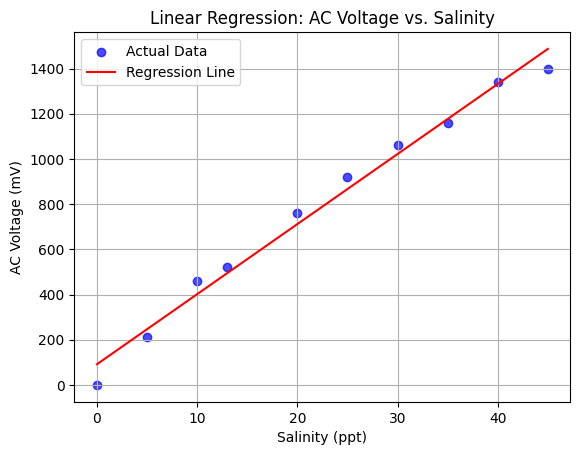

In [4]:
import matplotlib.pyplot as plt

# Generate predicted values using the regression equation
y_pred = slope * x + intercept

# Plot actual data points
plt.scatter(x, y, color='blue', label='Actual Data', alpha=0.7)

# Plot regression line
plt.plot(x, y_pred, color='red', label='Regression Line')

# Labels and title
plt.xlabel("Salinity (ppt)")
plt.ylabel("AC Voltage (mV)")
plt.title("Linear Regression: AC Voltage vs. Salinity")
plt.legend()
plt.grid()

# Show plot
plt.show()


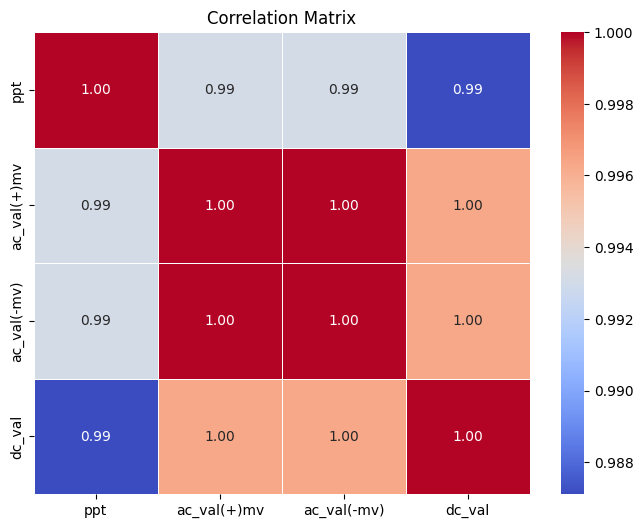

In [5]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix")

# Show plot
plt.show()


In [6]:
# Extract relevant columns for DC value
x_dc = df["ppt"]
y_dc = df["dc_val"]

# Perform linear regression for DC value
slope_dc, intercept_dc, r_value_dc, p_value_dc, std_err_dc = linregress(x_dc, y_dc)

# Regression equation for DC value
equation_dc = f"y = {slope_dc:.4f}x + {intercept_dc:.4f}"
r_squared_dc = r_value_dc ** 2

equation_dc, r_squared_dc



('y = 24.6493x + 94.8195', 0.9743833768260273)

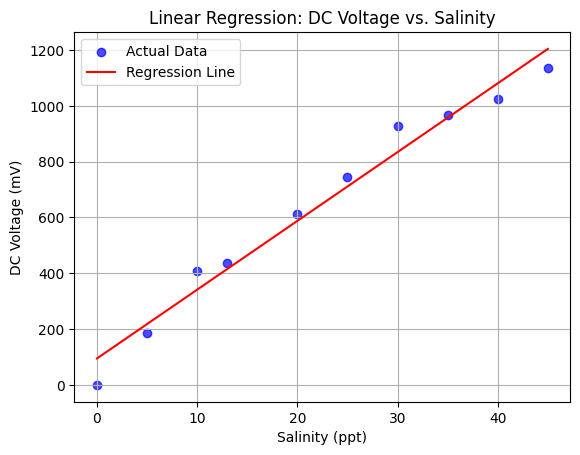

In [7]:
# Generate predicted values using the regression equation
y_pred_dc = slope_dc * x_dc + intercept_dc

# Plot actual data points
plt.scatter(x_dc, y_dc, color='blue', label='Actual Data', alpha=0.7)

# Plot regression line
plt.plot(x_dc, y_pred_dc, color='red', label='Regression Line')

# Labels and title
plt.xlabel("Salinity (ppt)")
plt.ylabel("DC Voltage (mV)")
plt.title("Linear Regression: DC Voltage vs. Salinity")
plt.legend()
plt.grid()

# Show plot
plt.show()


In [9]:
from scipy.stats import t

# Function to estimate ppt from AC voltage with 96% confidence interval
def estimate_ppt(ac_voltage, confidence=0.96):
    # Compute the estimated ppt
    estimated_ppt = (ac_voltage - intercept) / slope

    # Degrees of freedom (n - 2 for simple linear regression)
    n = len(df)
    dof = n - 2

    # Compute the t-critical value for 96% confidence
    t_critical = t.ppf((1 + confidence) / 2, dof)

    # Compute the margin of error using standard error
    margin_of_error = t_critical * std_err

    # Compute confidence interval
    lower_bound = estimated_ppt - margin_of_error
    upper_bound = estimated_ppt + margin_of_error

    return estimated_ppt, (lower_bound, upper_bound)

# Example: Testing with an AC voltage of 500 mV
example_ac_voltage = 3300
ppt_estimate, confidence_interval = estimate_ppt(example_ac_voltage)

ppt_estimate, confidence_interval


(103.46619282780263, (100.28472628704104, 106.64765936856422))